# Quantitative image analysis using SimpleITK
We can also use [SimpleITK](https://simpleitk.readthedocs.io/) for extracting features from label images. For convenience reasons we use the [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) library.

In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread
from pyclesperanto_prototype import imshow
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling
from napari_simpleitk_image_processing import label_statistics

As an example image we will use an extracgt from the [BBBC007 dataset](https://bbbc.broadinstitute.org/BBBC007) image set version 1 (Jones et al., Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications, 2005), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012].

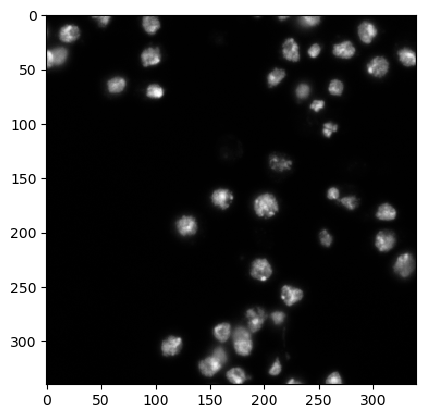

In [2]:
blobs = imread('../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif')
imshow(blobs)

## Starting point: a segmented label image

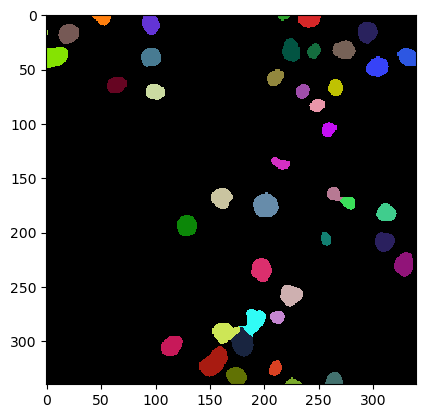

In [3]:
labels = voronoi_otsu_labeling(blobs, spot_sigma=3.5)
imshow(labels, labels=True)

## Label statistics
There is a function `label_statistics` that allows you to specify what you want to measure. Within the brackets behind, hit Shift+Tab to see what other options are available.

In [4]:
statistics = label_statistics(blobs, labels, size=True, shape=True, intensity=True)

df = pd.DataFrame(statistics)
df

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border
0,1,189.0,95.594203,95.753906,35.0,38.840425,13192.0,1508.578652,1.797964,18.439089,1.797964,0.0,9.885624,17.773998,41.643236,6.627727,138,19
1,2,96.0,79.125000,80.871094,61.0,10.881669,633.0,118.410714,2.529822,4.000000,2.529822,0.0,2.006573,5.076274,10.026513,1.595769,8,5
2,3,138.0,83.482759,85.832031,35.0,28.606981,4842.0,818.359347,2.138700,12.041595,2.138700,0.0,5.876166,12.567359,26.997213,4.296740,58,13
3,4,164.0,93.620536,91.785156,35.0,33.346042,20971.0,1111.958500,1.654121,22.135944,1.654121,0.0,13.130927,21.720147,53.055320,8.444016,224,21
4,5,165.0,89.698795,90.792969,32.0,27.717207,22335.0,768.243587,1.232971,19.723083,1.232971,0.0,16.035346,19.771114,55.937700,8.902761,249,9
5,6,198.0,98.710801,94.761719,33.0,39.441423,28330.0,1555.625862,1.192244,20.615528,1.192244,0.0,17.507068,20.872698,60.054545,9.557978,287,0
6,7,83.0,63.454545,63.011719,49.0,11.201461,698.0,125.472727,3.675703,6.000000,3.675703,0.0,1.952006,7.174995,11.757129,1.871205,11,7
7,8,208.0,99.050179,94.761719,32.0,40.663972,27635.0,1653.558624,1.129494,19.723083,1.129494,0.0,17.734351,20.030834,59.211632,9.423824,279,0
8,9,192.0,101.791209,103.691406,31.0,36.220886,27789.0,1311.952569,1.280479,21.023796,1.280479,0.0,16.475937,21.097095,58.571488,9.321942,273,0
9,10,169.0,89.158088,86.824219,33.0,28.747161,24251.0,826.399270,1.367414,21.587033,1.367414,0.0,15.914372,21.761535,58.464116,9.304853,272,0


These are all columns that are available:

In [5]:
print(statistics.keys())

Index(['label', 'maximum', 'mean', 'median', 'minimum', 'sigma', 'sum',
       'variance', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border'],
      dtype='object')


To get an overview about the measurements, we can use the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,44.0,22.500000,12.845233,1.000000,11.750000,22.500000,33.250000,44.000000
maximum,44.0,176.000000,40.704837,83.000000,162.000000,176.500000,199.500000,255.000000
mean,44.0,91.670929,11.991820,61.803030,86.543738,92.756422,99.520060,119.223301
median,44.0,90.116477,12.275056,59.042969,84.343750,91.289062,97.986328,113.613281
minimum,44.0,34.204545,6.121178,23.000000,31.000000,33.000000,35.000000,61.000000
sigma,44.0,33.064504,10.124795,10.881669,28.712116,32.985157,38.858542,63.206889
sum,44.0,20682.068182,10589.601489,633.000000,12348.000000,23618.000000,27684.000000,44901.000000
variance,44.0,1193.443088,682.363358,118.410714,824.389289,1088.024347,1509.987301,3995.110869
elongation,44.0,1.404297,0.488280,1.017426,1.170982,1.261308,1.391212,3.675703
feret_diameter,44.0,18.297767,5.102293,4.000000,14.499620,19.157173,21.118081,30.886890
